In [84]:
# importing packages and libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import nltk
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 
from nltk.corpus import sentiwordnet as swn
from sklearn import metrics

import gensim
from gensim import corpora
from gensim import models

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tanvimehta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# pip install -U gensim

In [11]:
train = pd.read_csv(r'train.csv', sep='\t', encoding='utf-8')
test = pd.read_csv(r'test.csv', sep='\t', encoding='utf-8')

In [12]:
train.head()

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0


In [13]:
train.isnull().sum()

text     0
label    0
dtype: int64

In [14]:
train.dtypes

text     object
label    object
dtype: object

In [15]:
train['label'].unique()

array(['1', '0', 'label'], dtype=object)

In [16]:
train['label'].value_counts()

0        2972
1        2014
label       1
Name: label, dtype: int64

In [17]:
train.drop(train[train['label']=='label'].index, inplace = True)

In [18]:
train['label'].unique()

array(['1', '0'], dtype=object)

In [19]:
train['label'] = pd.to_numeric(train['label'])

In [20]:
train.dtypes

text     object
label     int64
dtype: object

In [21]:
ind = train[train['label']==0].index

In [22]:
train.loc[ind,'type']='reliable'

In [23]:
ind = train[train['label']==1].index

In [24]:
train.loc[ind,'type']='fake'

In [25]:
train.head()

,text,label,type
0,Get the latest from TODAY Sign up for our news...,1,fake
1,2d Conan On The Funeral Trump Will Be Invited...,1,fake
2,It’s safe to say that Instagram Stories has fa...,0,reliable
3,Much like a certain Amazon goddess with a lass...,0,reliable
4,At a time when the perfect outfit is just one ...,0,reliable


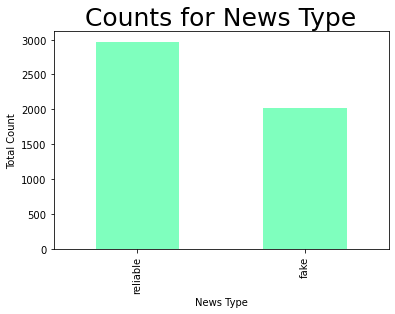

In [26]:
train.type.value_counts().plot(kind='bar', color='springgreen', alpha=0.5)
plt.xlabel('News Type')
plt.ylabel('Total Count')
plt.title("Counts for News Type", fontsize=25)
plt.savefig('newstypecounts.png', bbox_inches='tight', dpi = 300)

In [27]:
y = train['label']

In [28]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(train["text"], y, test_size = 0.33, random_state = 53)

In [29]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words = 'english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '000000', '000th', '001', '001100', '00113234', '002', '007', '008']


In [30]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
y_pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,y_pred)
print(score)

#confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.735722964763062
[[756 227]
 [208 455]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       983
           1       0.67      0.69      0.68       663

    accuracy                           0.74      1646
   macro avg       0.73      0.73      0.73      1646
weighted avg       0.74      0.74      0.74      1646



In [31]:
svm_classifier = svm.SVC()
svm_classifier.fit(count_train, y_train)
y_pred = svm_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,y_pred)
print(score)

#confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7223572296476306
[[941  42]
 [415 248]]
              precision    recall  f1-score   support

           0       0.69      0.96      0.80       983
           1       0.86      0.37      0.52       663

    accuracy                           0.72      1646
   macro avg       0.77      0.67      0.66      1646
weighted avg       0.76      0.72      0.69      1646



In [32]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])


['00', '000', '000000', '000th', '001', '001100', '00113234', '002', '007', '008']
[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.0339453 0.        ... 0.        0.        0.       ]]


In [33]:
nb_classifier = MultinomialNB()

nb_classifier.fit(tfidf_train, y_train)

y_pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,y_pred)
print(score)

#confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7095990279465371
[[957  26]
 [452 211]]
              precision    recall  f1-score   support

           0       0.68      0.97      0.80       983
           1       0.89      0.32      0.47       663

    accuracy                           0.71      1646
   macro avg       0.78      0.65      0.63      1646
weighted avg       0.76      0.71      0.67      1646



In [34]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    y_pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, y_pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))

Alpha:  0.0
Score:  0.7168894289185905
Alpha:  0.1
Score:  0.7679222357229648
Alpha:  0.2
Score:  0.7618469015795869
Alpha:  0.30000000000000004


/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Score:  0.7624544349939246
Alpha:  0.4
Score:  0.7448359659781288
Alpha:  0.5
Score:  0.7345078979343864
Alpha:  0.6000000000000001
Score:  0.727217496962333
Alpha:  0.7000000000000001
Score:  0.7223572296476306
Alpha:  0.8
Score:  0.7187120291616039
Alpha:  0.9
Score:  0.7138517618469016


In [35]:
nb_classifier = MultinomialNB(alpha=0.1)

nb_classifier.fit(tfidf_train, y_train)

y_pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,y_pred)
print(score)

#confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7679222357229648
[[869 114]
 [268 395]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       983
           1       0.78      0.60      0.67       663

    accuracy                           0.77      1646
   macro avg       0.77      0.74      0.75      1646
weighted avg       0.77      0.77      0.76      1646



In [36]:
svm_classifier = svm.SVC()
svm_classifier.fit(tfidf_train, y_train)
y_pred = svm_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,y_pred)
print(score)

#confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7624544349939246
[[900  83]
 [308 355]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       983
           1       0.81      0.54      0.64       663

    accuracy                           0.76      1646
   macro avg       0.78      0.73      0.73      1646
weighted avg       0.77      0.76      0.75      1646



In [37]:
punctuation = string.punctuation

In [38]:
def remove_punc(row):
    tokens = row.split()
    newtokens = [w for w in tokens if w.isalpha()]
    newtokens = [w for w in newtokens if w not in punctuation]
    return newtokens

In [39]:
train['no_punc_content'] = train.text.apply(remove_punc)

In [40]:
ps = PorterStemmer()

def stemmed_content(row):
    text = row['no_punc_content']
    stemmed_list = [ps.stem(word) for word in text]
    return (stemmed_list)

train['stemmed_words'] = train.apply(stemmed_content, axis=1)

train.head()

,text,label,type,no_punc_content,stemmed_words
0,Get the latest from TODAY Sign up for our news...,1,fake,"[Get, the, latest, from, TODAY, Sign, up, for,...","[get, the, latest, from, today, sign, up, for,..."
1,2d Conan On The Funeral Trump Will Be Invited...,1,fake,"[Conan, On, The, Funeral, Trump, Will, Be, Inv...","[conan, On, the, funer, trump, will, Be, invit..."
2,It’s safe to say that Instagram Stories has fa...,0,reliable,"[safe, to, say, that, Instagram, Stories, has,...","[safe, to, say, that, instagram, stori, ha, fa..."
3,Much like a certain Amazon goddess with a lass...,0,reliable,"[Much, like, a, certain, Amazon, goddess, with...","[much, like, a, certain, amazon, goddess, with..."
4,At a time when the perfect outfit is just one ...,0,reliable,"[At, a, time, when, the, perfect, outfit, is, ...","[At, a, time, when, the, perfect, outfit, is, ..."


In [41]:
english_stopwords = set(stopwords.words('english'))


def remove_stop(row):
    tokens = row['stemmed_words']
    newtokens = [w for w in tokens if w not in english_stopwords]
    return newtokens

train['no_stop_stemmed'] = train.apply(remove_stop, axis=1)



train.head()

,text,label,type,no_punc_content,stemmed_words,no_stop_stemmed
0,Get the latest from TODAY Sign up for our news...,1,fake,"[Get, the, latest, from, TODAY, Sign, up, for,...","[get, the, latest, from, today, sign, up, for,...","[get, latest, today, sign, newslett, No, one, ..."
1,2d Conan On The Funeral Trump Will Be Invited...,1,fake,"[Conan, On, The, Funeral, Trump, Will, Be, Inv...","[conan, On, the, funer, trump, will, Be, invit...","[conan, On, funer, trump, Be, invit, To, conan..."
2,It’s safe to say that Instagram Stories has fa...,0,reliable,"[safe, to, say, that, Instagram, Stories, has,...","[safe, to, say, that, instagram, stori, ha, fa...","[safe, say, instagram, stori, ha, far, surpass..."
3,Much like a certain Amazon goddess with a lass...,0,reliable,"[Much, like, a, certain, Amazon, goddess, with...","[much, like, a, certain, amazon, goddess, with...","[much, like, certain, amazon, goddess, height,..."
4,At a time when the perfect outfit is just one ...,0,reliable,"[At, a, time, when, the, perfect, outfit, is, ...","[At, a, time, when, the, perfect, outfit, is, ...","[At, time, perfect, outfit, one, click, high, ..."


In [42]:
def rejoin(row):
    my_list = row['no_stop_stemmed']
    joined_text = ( " ".join(my_list))
    return joined_text

train['pre_processed_text'] = train.apply(rejoin, axis=1)

train.head()

,text,label,type,no_punc_content,stemmed_words,no_stop_stemmed,pre_processed_text
0,Get the latest from TODAY Sign up for our news...,1,fake,"[Get, the, latest, from, TODAY, Sign, up, for,...","[get, the, latest, from, today, sign, up, for,...","[get, latest, today, sign, newslett, No, one, ...",get latest today sign newslett No one ever tru...
1,2d Conan On The Funeral Trump Will Be Invited...,1,fake,"[Conan, On, The, Funeral, Trump, Will, Be, Inv...","[conan, On, the, funer, trump, will, Be, invit...","[conan, On, funer, trump, Be, invit, To, conan...",conan On funer trump Be invit To conan tb
2,It’s safe to say that Instagram Stories has fa...,0,reliable,"[safe, to, say, that, Instagram, Stories, has,...","[safe, to, say, that, instagram, stori, ha, fa...","[safe, say, instagram, stori, ha, far, surpass...",safe say instagram stori ha far surpass compet...
3,Much like a certain Amazon goddess with a lass...,0,reliable,"[Much, like, a, certain, Amazon, goddess, with...","[much, like, a, certain, amazon, goddess, with...","[much, like, certain, amazon, goddess, height,...",much like certain amazon goddess height direct...
4,At a time when the perfect outfit is just one ...,0,reliable,"[At, a, time, when, the, perfect, outfit, is, ...","[At, a, time, when, the, perfect, outfit, is, ...","[At, time, perfect, outfit, one, click, high, ...",At time perfect outfit one click high demand t...


In [43]:
y = train['label']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(train['pre_processed_text'], y, test_size=0.33, random_state=53)

In [45]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])



['aa', 'aaa', 'aaaaand', 'aabb', 'aad', 'aaliyah', 'aandahl', 'aaron', 'aarp', 'aasen']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
nb_classifier = MultinomialNB()

nb_classifier.fit(tfidf_train, y_train)

y_pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,y_pred)
print(score)

#confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7053462940461726
[[953  30]
 [455 208]]
              precision    recall  f1-score   support

           0       0.68      0.97      0.80       983
           1       0.87      0.31      0.46       663

    accuracy                           0.71      1646
   macro avg       0.78      0.64      0.63      1646
weighted avg       0.76      0.71      0.66      1646



In [47]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    y_pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, y_pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))

Alpha:  0.0
Score:  0.7132442284325637
Alpha:  0.1
Score:  0.7624544349939246
Alpha:  0.2
Score:  0.7551640340218712
Alpha:  0.30000000000000004
Score:  0.7430133657351154
Alpha:  0.4
Score:  0.735722964763062
Alpha:  0.5
Score:  0.7339003645200486
Alpha:  0.6000000000000001
Score:  0.7296476306196841
Alpha:  0.7000000000000001
Score:  0.7253948967193196
Alpha:  0.8
Score:  0.7174969623329283
Alpha:  0.9
Score:  0.7120291616038882


/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [48]:
# Print the first 10 features
print(len(tfidf_vectorizer.get_feature_names()))

28000


In [53]:
tfidf_vectorizer = TfidfVectorizer(max_features = 500, stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)



In [54]:
nb_classifier = MultinomialNB(alpha=0.1)

nb_classifier.fit(tfidf_train, y_train)

y_pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,y_pred)
print(score)

#confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7278250303766707
[[894  89]
 [359 304]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       983
           1       0.77      0.46      0.58       663

    accuracy                           0.73      1646
   macro avg       0.74      0.68      0.69      1646
weighted avg       0.74      0.73      0.71      1646



In [87]:
classifiers = [MultinomialNB(),LinearSVC(), XGBClassifier(n_estimator=200)]

In [88]:
class pre_process(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def transform(self, X, y=None):
        
        def proc(z):
            text = z.split()
            text =  [w for w in text if w.isalpha()]
            text = [w for w in text if w not in punctuation]
            text = [ps.stem(word) for word in text]
            text = [w for w in text if w not in english_stopwords]
            text = " ".join(text)
            return text
        z = X.apply(proc)        
        return z
    def fit(self, df, y=None):
        return self

In [89]:
X_train, X_test, y_train, y_test = train_test_split(train['pre_processed_text'], y, test_size=0.33, random_state=53)

In [90]:
for classifier in classifiers:
    tfidf_pineline = Pipeline([
        #('preproc', pre_process()),
              ('cv', CountVectorizer(stop_words='english', max_features=500)),
              ('clf',  classifier  )])
    tfidf_pineline.fit(X_train,y_train)
    y_pred = tfidf_pineline.predict(X_test)
    print ("\n\nName of classifier being used with count vectorizer: \n\n" + str(classifier) + 
           "\n\nClassification Report : \n\n"+ str(metrics.classification_report(y_test,y_pred))  + "\n\n Accuracy of classifier : " + str(tfidf_pineline.score(X_test,y_test)))



Name of classifier being used with count vectorizer: 

MultinomialNB()

Classification Report : 

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       983
           1       0.65      0.59      0.62       663

    accuracy                           0.71      1646
   macro avg       0.69      0.69      0.69      1646
weighted avg       0.70      0.71      0.70      1646


 Accuracy of classifier : 0.7053462940461726


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "




Name of classifier being used with count vectorizer: 

LinearSVC()

Classification Report : 

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       983
           1       0.64      0.54      0.59       663

    accuracy                           0.69      1646
   macro avg       0.68      0.67      0.67      1646
weighted avg       0.69      0.69      0.69      1646


 Accuracy of classifier : 0.6913730255164034


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:59:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:59:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Name of classifier being used with count vectorizer: 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min

In [91]:
for classifier in classifiers:
    tfidf_pineline = Pipeline([
        #('preproc', pre_process()),
              ('cv', TfidfVectorizer(max_features=1000,stop_words='english',ngram_range=(2,2))),
              ('clf',  classifier  )])
    tfidf_pineline.fit(X_train,y_train)
    y_pred = tfidf_pineline.predict(X_test)
    print ("\n\nName of classifier being used with tfidf vectorizer: \n\n" + str(classifier) + 
           "\n\nClassification Report : \n\n"+ str(metrics.classification_report(y_test,y_pred))  + "\n\n Accuracy of classifier : " + str(tfidf_pineline.score(X_test,y_test)))



Name of classifier being used with tfidf vectorizer: 

MultinomialNB()

Classification Report : 

              precision    recall  f1-score   support

           0       0.73      0.90      0.81       983
           1       0.77      0.50      0.61       663

    accuracy                           0.74      1646
   macro avg       0.75      0.70      0.71      1646
weighted avg       0.75      0.74      0.73      1646


 Accuracy of classifier : 0.741190765492102


Name of classifier being used with tfidf vectorizer: 

LinearSVC()

Classification Report : 

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       983
           1       0.67      0.60      0.63       663

    accuracy                           0.72      1646
   macro avg       0.71      0.70      0.70      1646
weighted avg       0.72      0.72      0.72      1646


 Accuracy of classifier : 0.7199270959902795


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:00:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Name of classifier being used with tfidf vectorizer: 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min

In [81]:
tfidf_pineline = Pipeline([
#('preproc', pre_process()),
('cv', TfidfVectorizer(max_features=1000,stop_words='english',ngram_range=(2,2))),
('clf',  LogisticRegression())])
tfidf_pineline.fit(X_train,y_train)
y_pred = tfidf_pineline.predict(X_test)
print ("\n\nName of classifier being used with tfidf vectorizer: \n\n" + str(LogisticRegression) + 
           "\n\nClassification Report : \n\n"+ str(metrics.classification_report(y_test,y_pred))  + "\n\n Accuracy of classifier : " + str(tfidf_pineline.score(X_test,y_test)))



Name of classifier being used with tfidf vectorizer: 

<class 'sklearn.linear_model._logistic.LogisticRegression'>

Classification Report : 

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       983
           1       0.75      0.53      0.62       663

    accuracy                           0.74      1646
   macro avg       0.74      0.70      0.71      1646
weighted avg       0.74      0.74      0.73      1646


 Accuracy of classifier : 0.7387606318347509


In [86]:

tfidf_pineline = Pipeline([
#('preproc', pre_process()),
('cv', TfidfVectorizer(max_features=1000,stop_words='english',ngram_range=(2,2))),
('clf',  DecisionTreeClassifier())])

tfidf_pineline.fit(X_train,y_train)
y_pred = tfidf_pineline.predict(X_test)
print ("\n\nName of classifier being used with tfidf vectorizer: \n\n" + str(DecisionTreeClassifier) + 
           "\n\nClassification Report : \n\n"+ str(metrics.classification_report(y_test,y_pred))  + "\n\n Accuracy of classifier : " + str(tfidf_pineline.score(X_test,y_test)))



Name of classifier being used with tfidf vectorizer: 

<class 'sklearn.tree._classes.DecisionTreeClassifier'>

Classification Report : 

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       983
           1       0.63      0.63      0.63       663

    accuracy                           0.70      1646
   macro avg       0.69      0.69      0.69      1646
weighted avg       0.70      0.70      0.70      1646


 Accuracy of classifier : 0.6986634264884569
